 # <span style="color:DarkBlue; font-family: 'Arial'; font-size: em;">**S09 T02: Aprenentatge Supervisat - Regressions**</span>
 
 _**OBJETIVOS DE LA ACTIVIDAD**_
 

* Familiarizarse con el uso, evaluación y ajuste de modelos de regresión para aprendizaje supervisado

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer


In [2]:
fligth_df = pd.read_csv('Data/DelayedFlights.csv', sep = ',')

In [3]:
# fligth_df = fligth_df.sample (n = 10000)

In [4]:
fligth_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
fligth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [6]:
fligth_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

<span style="color:DarkBlue; font-family: 'Georgia'; font-size: em;">PRE-PROCESAMIENTO DE DATOS</span>

* Valores nulos y NaN. No tomaremos en cuenta las causas del retraso, 'CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay', por lo que podremos eliminar estas columnas que contienen una cantidad importante de valores Nulos o NaN 
* Eliminamos algunas columnas que realmente no aportan valor a un posible modelo predictivo como son las columnas de:'FlightNum', 'Unnamed: 0', 'Year' - todos los datos son del 2008, 'Cancelled' - Todos los valores son 0, al igual que 'Diverted', 'TailNum' podría darnos indicios de alguna aeronave que se retrase mas que otra, pero esto se refleja en el 'DepDelay', así como cualquier retraso asosciado al Origen 'Origin' y Destino 'Dest'
* Eliminaremos las filas restantes donde existan valores nulos, de forma tal de eliminar fuentes de error y mantenernos con un número importante de registros

In [7]:
fligth_df.drop (['CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay',
                'FlightNum','Unnamed: 0','Year','Cancelled','Diverted', 'CancellationCode',
                'TailNum','Origin','Dest'], axis = 1, inplace = True)

In [8]:
fligth_df.dropna(inplace = True)

In [9]:
fligth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Distance           int64  
 14  TaxiIn             float64
 15  TaxiOut            float64
dtypes: float64(9), int64(6), object(1)
memory usage: 250.1+ MB


_NOTA:_

Para poder tomar e cuenta el atributo de la aerolinea en el modelo de regresión aplicaremos un dummies sobre "UniqueCarrier".

In [10]:
dummies = pd.get_dummies (fligth_df['UniqueCarrier'])

In [11]:
fligth_df = pd.concat ([fligth_df,dummies], axis = 1)

In [12]:
fligth_df.drop (['UniqueCarrier'], axis = 1, inplace = True)

In [13]:
fligth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   ActualElapsedTime  float64
 8   CRSElapsedTime     float64
 9   AirTime            float64
 10  ArrDelay           float64
 11  DepDelay           float64
 12  Distance           int64  
 13  TaxiIn             float64
 14  TaxiOut            float64
 15  9E                 uint8  
 16  AA                 uint8  
 17  AQ                 uint8  
 18  AS                 uint8  
 19  B6                 uint8  
 20  CO                 uint8  
 21  DL                 uint8  
 22  EV                 uint8  
 23  F9                 uint8  
 24  FL                 uint8  
 25  HA                

In [14]:
target = ['ArrDelay']
predictors = list(set(list(fligth_df.columns))-set(target))

X = fligth_df [predictors].values
y = fligth_df [target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [15]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:  ', y_train.shape)
print('Testing Features Shape: ', X_test.shape)
print('Testing Labels Shape:   ', y_test.shape)

Training Features Shape: (1349859, 34)
Training Labels Shape:   (1349859, 1)
Testing Features Shape:  (578512, 34)
Testing Labels Shape:    (578512, 1)


<span style="color:DarkBlue; font-family: 'Georgia'; font-size: em;">EJERCICIO 1-3-4</span>

* Crear varios modelos de regresión que intenten predecir el tiempo de retraso en la llegada de los vuelos (ArrDelay)
* Entrenar los modelos creados

_**Modelo 1 - Random Forest con SKLearn**_

In [16]:
modelo_1_RF = RandomForestRegressor (n_estimators = 50, random_state = 42)

In [17]:
modelo_1_RF.fit(X_train,y_train)

<ipython-input-17-8d5936d3c583>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_1_RF.fit(X_train,y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [18]:
y_predict = modelo_1_RF.predict(X_test)

In [19]:
mse_modelo_1 = mean_squared_error(y_test, y_predict)

In [20]:
r2_modelo_1 = r2_score(y_test, y_predict)

In [21]:
print ('MSE del Modelo 1: {}'.format(mse_modelo_1))
print ('R2 del Modelo 1 : {}'.format(r2_modelo_1))

MSE del Modelo 1: 14.71338960713002
R2 del Modelo 1 : 0.9954130024982177


_**Modelo 2 - Decision Tree con SKLearn**_

In [22]:
modelo_2_DT = DecisionTreeRegressor(random_state=0)

In [23]:
modelo_2_DT.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
y_predict_m2 = modelo_2_DT.predict(X_test)

In [25]:
mse_modelo_2 = mean_squared_error(y_test, y_predict_m2)

In [26]:
r2_modelo_2 = r2_score(y_test, y_predict_m2)

In [27]:
print ('MSE del Modelo 2: {}'.format(mse_modelo_2))
print ('R2 del Modelo 2 : {}'.format(r2_modelo_2))

MSE del Modelo 2: 35.05978614099621
R2 del Modelo 2 : 0.9890698774561207


_**Modelo 3 - Neural Network con SKLearn**_

In [28]:
modelo_3_NN = MLPRegressor(hidden_layer_sizes=(10,),random_state=1, activation='relu', solver='adam', max_iter=250)

In [29]:
modelo_3_NN.fit(X_train,y_train)

C:\Users\tecnico-comercial\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(10,), max_iter=250, random_state=1)

In [30]:
y_predict_m3 = modelo_3_NN.predict(X_test)

In [31]:
mse_modelo_3 = mean_squared_error(y_test, y_predict_m3)

In [32]:
r2_modelo_3 = r2_score(y_test, y_predict_m3)

In [33]:
print ('MSE del Modelo 3: {}'.format(mse_modelo_3))
print ('R2 del Modelo 3 : {}'.format(r2_modelo_3))

MSE del Modelo 3: 0.16552863638563345
R2 del Modelo 3 : 0.9999483953418045


<span style="color:DarkBlue; font-family: 'Georgia'; font-size: em;">EJERCICIO 2</span>

* Comparar el desempeño de los modelos haciendo uso de MSE y R2. 


In [34]:
desempeño_df = pd.DataFrame ({'model': ['M1-RandomForest', 'M2-Decision Tree', 'M3-Neural Network'],
                            'MSE': [mse_modelo_1,mse_modelo_2,mse_modelo_3],
                            'R2': [r2_modelo_1, r2_modelo_2, r2_modelo_3]})

In [35]:
desempeño_df.head()

,model,MSE,R2
0,M1-RandomForest,14.713390,0.995413
1,M2-Decision Tree,35.059786,0.989070
2,M3-Neural Network,0.165529,0.999948


_Grafico de compración de los MSE_

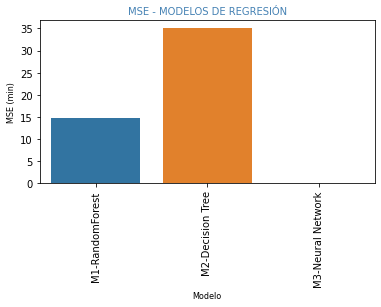

In [36]:
plt.figure (figsize = (6,3))
sns.barplot (data = desempeño_df, x = desempeño_df['model'], y = desempeño_df['MSE'])
fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 10}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 8}

plt.title("MSE - MODELOS DE REGRESIÓN", fontdict = fuente_titulo)
plt.xlabel("Modelo", fontdict = fuente_ejes)
plt.xticks(rotation=90)
plt.ylabel("MSE (min)", fontdict = fuente_ejes)
plt.show()

_Grafico de compración de los R2_

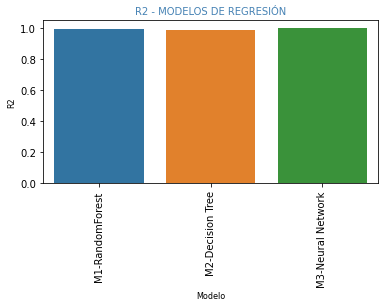

In [37]:
plt.figure (figsize = (6,3))
sns.barplot (data = desempeño_df, x = desempeño_df['model'], y = desempeño_df['R2'])
fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 10}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 8}

plt.title("R2 - MODELOS DE REGRESIÓN", fontdict = fuente_titulo)
plt.xlabel("Modelo", fontdict = fuente_ejes)
plt.xticks(rotation=90)
plt.ylabel("R2", fontdict = fuente_ejes)
plt.show()

CONCLUSIÓN:

Tomando como referencia el indicados de MSE, el M3 - Neural Network se comporta bastante mejor que el resto de modelos. Sin embargo, posiblemente estemos ante un caso de Overfitting, lo que hace que al pasar datos diferentes a los utilizados para el entrenamiento y el test, el modelo 3 no sea tan preciso.

Respecto al indicador R2, vemos que todos se comportan bastante bien con respecto al BaseLine, por encima de un 90% en todos los casos

<span style="color:DarkBlue; font-family: 'Georgia'; font-size: em;">EJERCICIO 5</span>

* Ingeniería de datos para intentar mejorar las predicciones

<span style="color:Black; font-family: 'Georgia'; font-size: em;" > **'Month', 'DayofMonth' y 'DayOfWeek'** </span>

Son realmente varialbes categóricas. Las eliminaremos de los predictores </span>

In [38]:
fligth_df.drop (['Month','DayofMonth','DayOfWeek'], axis = 1, inplace = True)

**Normalización**

In [39]:
normalizer = Normalizer()

In [40]:
normalizer_array = normalizer.fit_transform(fligth_df[['DepTime', 'CRSDepTime', 
                                                       'ArrTime', 'CRSArrTime','ActualElapsedTime',
                                                      'CRSElapsedTime','AirTime', 'DepDelay', 'Distance',
                                                      'TaxiIn', 'TaxiOut']])

In [41]:
normalizer_df = pd.DataFrame(normalizer_array)

In [42]:
normalizer_df.rename(columns = {0 : 'DepTime_nml', 1 : 'CRSDepTime_nml',  2: 'ArrTime_nml',
                               3 : 'CRSArrTime_nml',4 : 'ActualElapsedTime_nml',5 : 'CRSElapsedTime_nml'
                               ,6 : 'AirTime_nml',7 : 'DepDelay_nml',8 : 'Distance_nml'
                               ,9 : 'TaxiIn_nml',10 : 'TaxiOut_nml'}, inplace = True)

In [43]:
fligth_df.drop (['DepTime', 'CRSDepTime','ArrTime', 'CRSArrTime','ActualElapsedTime',
               'CRSElapsedTime','AirTime', 'DepDelay', 'Distance','TaxiIn', 'TaxiOut'], inplace = True, axis = 1)

In [44]:
final_fligth_df = pd.concat([fligth_df.reset_index(drop=True),normalizer_df.reset_index(drop=True)], axis = 1)

In [45]:
target_procesced = ['ArrDelay']
predictors_procesced = list(set(list(final_fligth_df.columns))-set(target))

X = final_fligth_df [predictors_procesced].values
y = final_fligth_df [target_procesced].values

X_train_procesced, X_test_procesced, y_train_procesced, y_test_procesced = train_test_split(X, y, test_size=0.30, random_state=0)

MODELOS DE REGRESIÓN CON DATOS PRE-PROCESADOS

_**Modelo 1 - Random Forest con SKLearn**_

In [46]:
modelo_1_RF_preprocesced = RandomForestRegressor (n_estimators = 50, random_state = 42)

In [47]:
modelo_1_RF_preprocesced.fit(X_train_procesced,y_train_procesced)

<ipython-input-47-1bed63e8581f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_1_RF_preprocesced.fit(X_train_procesced,y_train_procesced)


MemoryError: could not allocate 117440512 bytes

In [ ]:
y_predict_prepocesced = modelo_1_RF_preprocesced.predict(X_test_procesced)

In [ ]:
mse_modelo_1_preprocesced = mean_squared_error(y_test_procesced, y_predict_prepocesced)

In [ ]:
r2_modelo_1_preprocesced = r2_score(y_test_procesced, y_predict_prepocesced)

In [ ]:
print ('MSE del Modelo 1 - Datos Procesados: {}'.format(mse_modelo_1_preprocesced))
print ('R2 del Modelo 1 - Datos Procesados : {}'.format(r2_modelo_1_preprocesced))

_**Modelo 2 - Decision Tree con SKLearn**_

In [ ]:
modelo_2_DT_preprocesced = DecisionTreeRegressor(random_state=0)

In [ ]:
modelo_2_DT_preprocesced.fit(X_train_procesced,y_train_procesced)

In [ ]:
y_predict_m2_prepocesced = modelo_2_DT_preprocesced.predict(X_test_procesced)

In [ ]:
mse_modelo_2_preprocesced = mean_squared_error(y_test_procesced, y_predict_m2_prepocesced)

In [ ]:
r2_modelo_2_preprocesced = r2_score(y_test_procesced, y_predict_m2_prepocesced)

In [ ]:
print ('MSE del Modelo 2 - Datos Procesados: {}'.format(mse_modelo_2_preprocesced))
print ('R2 del Modelo 2 - Datos Procesados : {}'.format(r2_modelo_2_preprocesced))

_**Modelo 3 - Neural Network con SKLearn**_

In [ ]:
modelo_3_NN_preprocesced = MLPRegressor(hidden_layer_sizes=(10,),random_state=1, activation='relu', solver='adam', max_iter=250)

In [ ]:
modelo_3_NN_preprocesced.fit(X_train_procesced,y_train_procesced)

In [ ]:
y_predict_m3__preprocesced = modelo_3_NN_preprocesced.predict(X_test_procesced)

In [ ]:
mse_modelo_3_preprocesced = mean_squared_error(y_test_procesced, y_predict_m3__preprocesced)

In [ ]:
r2_modelo_3_preprocesced = r2_score(y_test_procesced, y_predict_m3__preprocesced)

In [ ]:
print ('MSE del Modelo 3 - Datos Procesados: {}'.format(mse_modelo_3_preprocesced))
print ('R2 del Modelo 3 - Datos Procesados : {}'.format(r2_modelo_3_preprocesced))

CONCLUSION

Vemos que el pre procesamiento de datos en este caso empeoró el desempeño de todos los modelos de regresión, con importante impacto en el caso del de redes Neuronales. 

